In [72]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.express import box

In [7]:
# Importando base de dados limpa
dados = pd.read_json('../Telco-Customer-Churn-limpeza.json')

In [8]:
dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
dados.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
dados.describe(include=[object])

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [101]:
def compara_churn(data,coluna,churn='Churn'):
    plot = sns.countplot(data = data, x=coluna, hue='Churn');
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width() / 2, i.get_height()),
                      ha='center',
                      va='baseline',
                      fontsize=12,
                      color='black',
                      xytext=(0, 1),
                      textcoords='offset points')
    return plot

<AxesSubplot:xlabel='Churn', ylabel='count'>

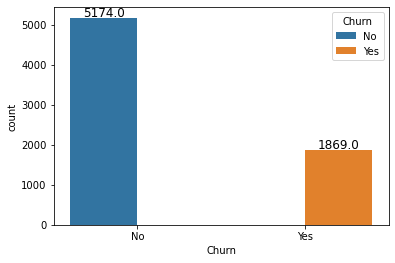

In [105]:
compara_churn(data=dados,coluna='Churn')

<AxesSubplot:xlabel='gender', ylabel='count'>

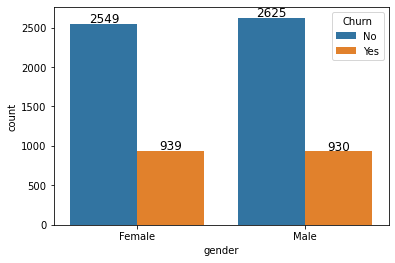

In [118]:
compara_churn(data=dados,coluna='gender')


essa distribuição não parece ter muita relação com os clientes que estão saindo,
pois está proporcionalmente igual


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

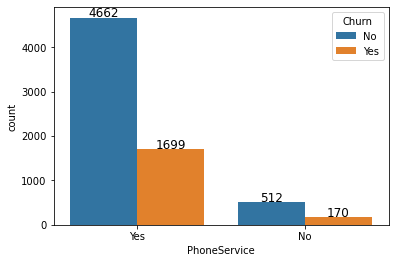

In [119]:
compara_churn(data=dados,coluna='PhoneService')
#

Aqui conseguimos analisar que a maior parte dos clientes que saíram tinham serviço de telefonia.
A Alura Voz poderia ver o que está fazendo com que as pessoas que tem esse serviço estão dando churn


<AxesSubplot:xlabel='InternetService', ylabel='count'>

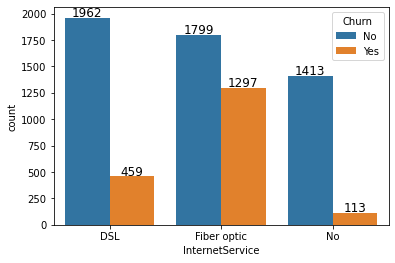

In [120]:
compara_churn(data=dados,coluna='InternetService')

Maior parte dos clientes que saíram tinham serviço de fíbra ótica.
A Alura Voz deve analisar o serviço de fibra ótica ou oferecer mais o serviço de DSL


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

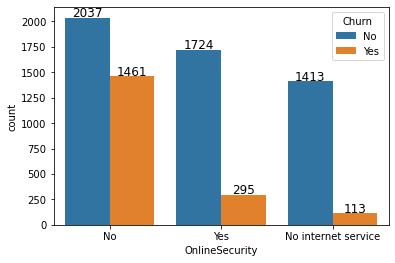

In [107]:
compara_churn(data=dados,coluna='OnlineSecurity')

Muitos dos clientes que deram churn não tinham serviço de OnlineSecurity.
Talvez esse serviço faça diferença na permanencia dos clientes.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

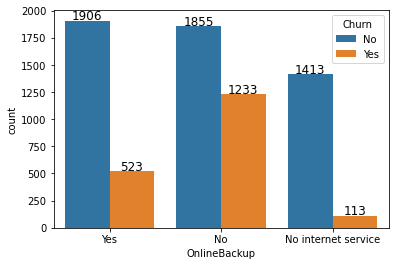

In [108]:
compara_churn(data=dados,coluna='OnlineBackup')

Muitos dos clientes que deram churn não tinham serviço de OnlineBackup.
Pode-se considerar que o número de pessoas que tinham e saíram também foi alto.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

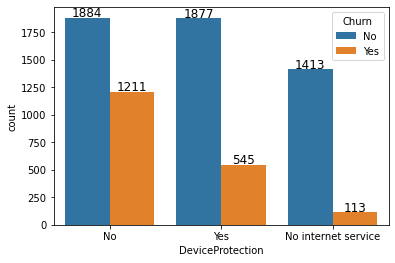

In [109]:
compara_churn(data=dados,coluna='DeviceProtection')

Muitos dos clientes que deram churn não tinham serviço de DeviceProtection.
Pode-se considerar que o número de pessoas que tinham e saíram também foi alto.


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

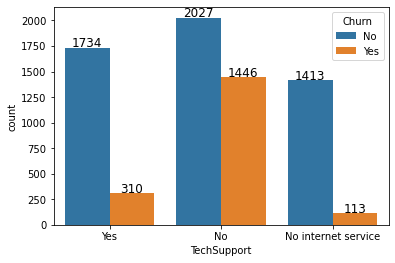

In [125]:
compara_churn(data=dados,coluna='TechSupport')

Muitos dos clientes que deram churn não tinham serviço de TechSupport.
Oferecer esse produto pode ajudar os clientes a ficarem na empresa

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

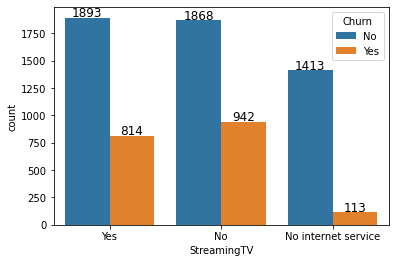

In [111]:
compara_churn(data=dados,coluna='StreamingTV')
#

Aparentemente está equilibrado e não tem nenhuma relação. 

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

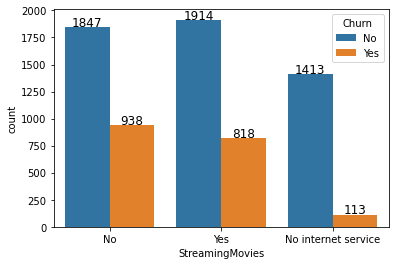

In [112]:
compara_churn(data=dados,coluna='StreamingMovies')
#

Aparentemente está equilibrado e não tem nenhuma relação. 

<AxesSubplot:xlabel='Contract', ylabel='count'>

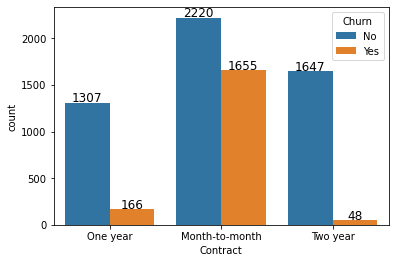

In [113]:
compara_churn(data=dados,coluna='Contract')

Pelo gráfico acima temos que os clientes que possuem um contrato mensal são os que tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de contrato anual ou de dois anos é uma boa opção para reduzir a taxa de cancelamentos.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

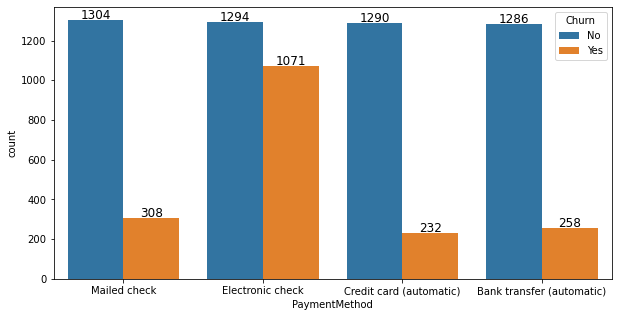

In [133]:
fig = plt.figure(figsize=(10,5))
compara_churn(data=dados,coluna='PaymentMethod')

Os clientes que tinham Check Eletronico como meio de pagamento tiveram a maior evasão

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

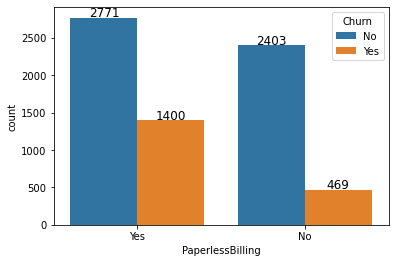

In [115]:
compara_churn(data=dados,coluna='PaperlessBilling')
#

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

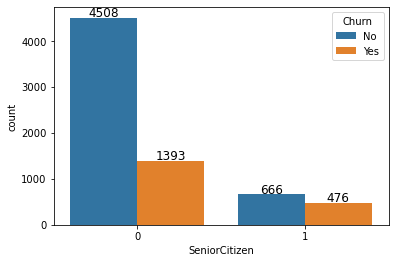

In [116]:
compara_churn(data=dados,coluna='SeniorCitizen')


Apesar da quantidade de clientes idosos ser menor, a proporção de clientes que cancelaram o serviço entre os idosos é maior que a de clientes que não são idosos. Entender os motivos que estão levando a essa taxa de cancelamento entre os idosos e adotar medidas para melhorar o serviço para esses clientes é uma boa opção para reduzir a taxa de cancelamento.

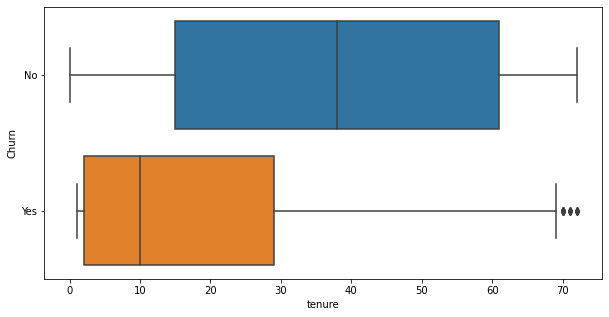

In [143]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='tenure',y ='Churn',data=dados);

Pessoas com maior tempo de contrato tendem a se manter na empresa

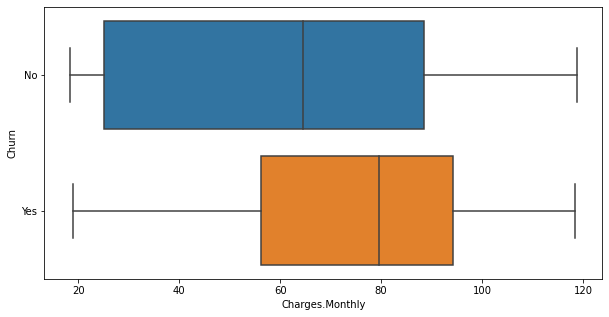

In [144]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='Charges.Monthly',y ='Churn',data=dados);

Pessoas que gastam menos no pacote mensal tendem a ficar na empresa

In [152]:
dados.corr()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
SeniorCitizen,1.000000,0.016567,0.220173,0.102997
tenure,0.016567,1.000000,0.247900,0.826164
Charges.Monthly,0.220173,0.247900,1.000000,0.651182
Charges.Total,0.102997,0.826164,0.651182,1.000000


<AxesSubplot:>

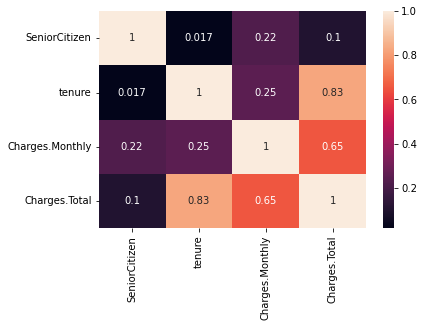

In [154]:
sns.heatmap(dados.corr(),annot=True)

Temos uma grande relação de tenure com Charges.Total